In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape
from shapely import wkt
import json

# Cargar el CSV con geometrías
df_geometrias = pd.read_csv('Departamentos (2010).csv')
df_geometrias.columns = ["Código","Nombre","Código de provincia","Nombre de provincia","Superficie_en_km2","Latitud_del_centroide","Longitud_del_centroide","Geometría_en_GeoJSON"]
# Convertir la columna GeoJSON a geometrías Shapely
df_geometrias['geometry'] = df_geometrias['Geometría_en_GeoJSON'].apply(
    lambda x: shape(json.loads(x)) if pd.notnull(x) and isinstance(x, str) else (
        shape(x) if pd.notnull(x) and isinstance(x, dict) else None
    )
)

# Convertir a GeoDataFrame
gdf_departamentos = gpd.GeoDataFrame(
    df_geometrias, 
    geometry='geometry',
    crs="EPSG:4326"  # Sistema de coordenadas WGS84
)

# Verificar que funcionó
print(f"Total de geometrías: {len(gdf_departamentos)}")
print(f"CRS: {gdf_departamentos.crs}")
gdf_departamentos.head(2)


Total de geometrías: 525
CRS: EPSG:4326


,Código,Nombre,Código de provincia,Nombre de provincia,Superficie_en_km2,Latitud_del_centroide,Longitud_del_centroide,Geometría_en_GeoJSON,geometry
0,6007,Adolfo Alsina,6,Buenos Aires,5879.072329,-37.197150,-63.055734,"{""type"":""Polygon"",""coordinates"":[[[-63.206605,...","POLYGON ((-63.2066 -36.67023, -63.16748 -36.70..."
1,6014,Adolfo Gonzales Chaves,6,Buenos Aires,3785.063690,-37.964953,-60.248503,"{""type"":""Polygon"",""coordinates"":[[[-60.359343,...","POLYGON ((-60.35934 -37.74854, -60.32281 -37.7..."


Primeras geometrías:
  0: Polygon - POLYGON ((-63.206605 -36.670233, -63.167484 -36.70258, -63.12865 -36.734226, -63.065658 -36.785983, -63.050783 -36.79819, -63.008545 -36.832192, -63.008137 -36.832524, -63.005486 -36.834641, -62.969411 -36.86351, -62.847869 -36.962698, -62.847851 -36.962715, -62.847715 -36.962824, -62.840979 -36.968198, -62.818161 -36.986458, -62.792715 -37.006808, -62.770242 -37.02477, -62.731861 -37.055408, -62.731096 -37.056018, -62.686601 -37.091502, -62.685955 -37.09201, -62.685939 -37.091996, -62.677932 -37.098397, -62.676401 -37.09961, -62.661968 -37.111093, -62.661854 -37.111184, -62.661127 -37.111789, -62.651752 -37.119545, -62.646771 -37.123651, -62.638697 -37.122224, -62.637994 -37.122091, -62.636391 -37.12178, -62.602581 -37.09843, -62.593989 -37.096963, -62.593545 -37.101052, -62.591659 -37.10479, -62.590425 -37.10706, -62.590358 -37.107098, -62.589955 -37.107812, -62.587266 -37.109423, -62.585158 -37.112276, -62.582493 -37.115585, -62.577801 -37.118323,

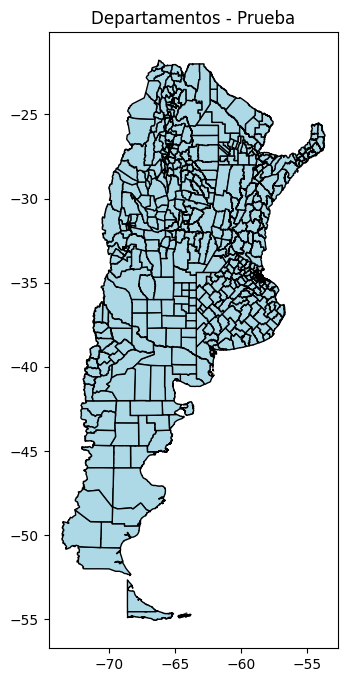

In [8]:
# Verificar las primeras geometrías
print("Primeras geometrías:")
for i, geom in enumerate(gdf_departamentos['geometry'].head(3)):
    print(f"  {i}: {geom.geom_type} - {geom}")

# Hacer un plot simple de prueba
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_departamentos.plot(ax=ax, color='lightblue', edgecolor='black')
ax.set_title('Departamentos - Prueba')
plt.show()

In [10]:
datos_por_departamento_actividad = pd.read_csv('TablasModificadas/Datos_departamento/Datos_departamento_por_actividad_y_sexo_limpios.csv')

In [ ]:
# Agrupar por departamento para sumar establecimientos
establecimientos_por_departamento = datos_por_departamento_actividad.groupby('departamento').agg({
    'establecimientos': 'sum',pd.read_csv('Departamentos (2010).csv')
    'empleados': 'sum',
    'empresas_exportadoras': 'sum',
    'clae6': 'nunique'  # Cantidad de rubros diferentes
}).reset_index()

# Renombrar columnas para claridad
establecimientos_por_departamento.columns = [
    'departamento', 
    'total_establecimientos', 
    'total_empleados', 
    'total_exportadoras', 
    'cantidad_rubros'
]

print("=== RESUMEN POR DEPARTAMENTO ===")
print(f"Total departamentos: {len(establecimientos_por_departamento)}")
print(f"Establecimientos totales: {establecimientos_por_departamento['total_establecimientos'].sum():,.0f}")
print(f"Empleados totales: {establecimientos_por_departamento['total_empleados'].sum():,.0f}")

# Mostrar top 10 departamentos
print("\n🔝 TOP 10 DEPARTAMENTOS POR ESTABLECIMIENTOS:")
top_10 = establecimientos_por_departamento.nlargest(10, 'total_establecimientos')[
    ['departamento', 'total_establecimientos', 'total_empleados', 'cantidad_rubros']
]
print(top_10.to_string(index=False))

=== RESUMEN POR DEPARTAMENTO ===
Total departamentos: 445
Establecimientos totales: 955,718
Empleados totales: 6,595,449

🔝 TOP 10 DEPARTAMENTOS POR ESTABLECIMIENTOS:
      departamento  total_establecimientos  total_empleados  cantidad_rubros
           Capital                 95488.0         717966.0              861
          Comuna 1                 54124.0         543181.0              846
           Rosario                 34253.0         251188.0              778
         Comuna 14                 21489.0         136207.0              660
General Pueyrredón                 20167.0         118660.0              688
         Comuna 13                 19275.0         111298.0              670
        La Matanza                 17093.0         127962.0              666
          Comuna 2                 15519.0          88651.0              601
General San Martín                 14675.0         103946.0              681
          Comuna 3                 14413.0          96510.0    

In [27]:
# Diccionario completo de correcciones
correcciones_capital = {
    "Neuquén": "Capital (Neuquén)",
    "Córdoba": "Capital (Córdoba)", 
    "Tucumán": "Capital (Tucumán)",
    "Salta": "Capital (Salta)",
    "Corrientes": "Capital (Corrientes)",
    "Misiones": "Capital (Misiones)",
    "Santiago del Estero": "Capital (Santiago del Estero)",
    "La Rioja": "Capital (La Rioja)",
    "Catamarca": "Capital (Catamarca)",
    "Mendoza": "Capital (Mendoza)",
    "La Pampa": "Capital (La Pampa)",
    # Agregar otras provincias si es necesario
}

In [36]:
import pandas as pd

# Cargar el CSV
df = pd.read_csv('Departamentos (2010).csv')

# Todas las provincias que necesitan corrección (basado en tu imagen)
provincias_corregir = [
    "Neuquén", "Córdoba", "Tucumán", "Salta", "Corrientes", 
    "Misiones", "Santiago del Estero", "La Rioja", "Catamarca", 
    "Mendoza", "La Pampa", "San Juan"
]

def corregir_todos_capital(row):
    nombre = row['Nombre']
    provincia = row['Nombre de provincia']
    
    # Si el departamento se llama "Capital" y NO es Buenos Aires
    if nombre == "Capital" and provincia != "Buenos Aires":
        return f"Capital ({provincia})"
    
    return nombre

# Aplicar corrección universal
df['Nombre'] = df.apply(corregir_todos_capital, axis=1)
    
# Verificar resultado
capitales_final = df[df['Nombre'].str.contains('Capital', na=False)]
print("Resultado final después de corrección universal:")
print(capitales_final[['Nombre', 'Nombre de provincia']].to_string())

# Guardar el CSV corregido
df.to_csv('departamentos_corregidos_completo.csv', index=False)

Resultado final después de corrección universal:
                            Nombre  Nombre de provincia
134             Capital (La Rioja)             La Rioja
151              Capital (Mendoza)              Mendoza
172             Capital (San Juan)             San Juan
194            Capital (Catamarca)            Catamarca
205              Capital (Córdoba)              Córdoba
232           Capital (Corrientes)           Corrientes
339             Capital (La Pampa)             La Pampa
362             Capital (Misiones)             Misiones
408                Capital (Salta)                Salta
435                     La Capital             San Luis
452                     La Capital             Santa Fe
469  Capital (Santiago del Estero)  Santiago del Estero
501              Capital (Tucumán)              Tucumán


In [37]:
# Verificar que no queden departamentos llamados solo "Capital" (excepto Buenos Aires)
capitales_problematicas = df[
    (df['Nombre'] == 'Capital') & 
    (df['Nombre de provincia'] != 'Buenos Aires')
]

if len(capitales_problematicas) == 0:
    print("✅ Todos los departamentos 'Capital' han sido corregidos correctamente")
else:
    print("❌ Aún quedan departamentos 'Capital' sin corregir:")
    print(capitales_problematicas[['Nombre', 'Nombre de provincia']].to_string())

✅ Todos los departamentos 'Capital' han sido corregidos correctamente


In [42]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import json
from matplotlib.colors import LinearSegmentedColormap

# Cargar los datos de establecimientos
df_establecimientos = pd.read_csv('/home/Estudiante/Labo-Datos-master-master (2)/Trabajo Practico 1/TablasModificadas/Datos_departamento/Datos_departamento_por_actividad_y_sexo_limpios.csv')

# Verificar los datos
print("Datos de establecimientos:")
print(df_establecimientos.head())
print("\nColumnas:", df_establecimientos.columns.tolist())
print(f"Filas: {len(df_establecimientos)}")

# Agrupar por departamento para obtener el total de establecimientos
establecimientos_por_depto = df_establecimientos.groupby('departamento')['establecimientos'].sum().reset_index()

print("\nEstablecimientos por departamento:")
print(establecimientos_por_depto.head())
print(f"Departamentos únicos: {len(establecimientos_por_depto)}")

Datos de establecimientos:
    departamento   clae6  empleados  establecimientos  empresas_exportadoras
0  12 de Octubre   11501       21.0               7.0                    6.0
1  12 de Octubre  461011       31.0               3.0                    6.0
2  12 de Octubre  131110      215.0               7.0                    4.0
3  12 de Octubre   11119      147.0              41.0                    4.0
4  12 de Octubre   11121       20.0               1.0                    1.0

Columnas: ['departamento', 'clae6', 'empleados', 'establecimientos', 'empresas_exportadoras']
Filas: 89063

Establecimientos por departamento:
    departamento  establecimientos
0  12 de Octubre             187.0
1     1º de Mayo              90.0
2     2 de Abril             169.0
3     25 de Mayo            1700.0
4     9 de Julio            2412.0
Departamentos únicos: 445


In [43]:
# CARGAR EL GEOJSON ORIGINAL (no el CSV corregido)
try:
    # Reemplaza con la ruta correcta a tu archivo GeoJSON
    gdf = gpd.read_file('ruta/a/tu/archivo.geojson')
    print("GeoJSON cargado correctamente")
    print(f"GeoDataFrame shape: {gdf.shape}")
    print(f"Columnas del GeoDataFrame: {gdf.columns.tolist()}")
    
except Exception as e:
    print(f"Error cargando GeoJSON: {e}")
    # Vamos a crear un ejemplo alternativo

Error cargando GeoJSON: ruta/a/tu/archivo.geojson: No such file or directory


In [47]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import json
from shapely.geometry import shape
from matplotlib.colors import LinearSegmentedColormap

# Cargar los datos de establecimientos
df_establecimientos = pd.read_csv('TablasModificadas/Datos_departamento/Datos_departamento_por_actividad_y_sexo_limpios.csv')

# Cargar el CSV con geometrías (tu código que funciona)
df_geometrias = pd.read_csv('departamentos_corregidos_completo.csv')
df_geometrias.columns = ["Código","Nombre","Código de provincia","Nombre de provincia","Superficie_en_km2","Latitud_del_centroide","Longitud_del_centroide","Geometría_en_GeoJSON"]

# Convertir la columna GeoJSON a geometrías Shapely
df_geometrias['geometry'] = df_geometrias['Geometría_en_GeoJSON'].apply(
    lambda x: shape(json.loads(x)) if pd.notnull(x) and isinstance(x, str) else (
        shape(x) if pd.notnull(x) and isinstance(x, dict) else None
    )
)

# Convertir a GeoDataFrame
gdf_departamentos = gpd.GeoDataFrame(
    df_geometrias, 
    geometry='geometry',
    crs="EPSG:4326"  # Sistema de coordenadas WGS84
)

print(f"GeoDataFrame cargado: {len(gdf_departamentos)} departamentos")

# Agrupar establecimientos por departamento
establecimientos_por_depto = df_establecimientos.groupby('departamento')['establecimientos'].sum().reset_index()

print(f"Datos de establecimientos: {len(establecimientos_por_depto)} departamentos")
print("Muestra de establecimientos por departamento:")
print(establecimientos_por_depto.head())

# Unir los datos geoespaciales con los datos de establecimientos
gdf_merged = gdf_departamentos.merge(establecimientos_por_depto, 
                                    left_on='Nombre', 
                                    right_on='departamento', 
                                    how='left')

print(f"Departamentos unidos: {len(gdf_merged)}")
print(f"Departamentos con datos de establecimientos: {gdf_merged['establecimientos'].notna().sum()}")

# Verificar coincidencias
deptos_sin_datos = gdf_merged[gdf_merged['establecimientos'].isna()]
if len(deptos_sin_datos) > 0:
    print(f"Departamentos sin datos: {len(deptos_sin_datos)}")
    print(deptos_sin_datos[['Nombre', 'Nombre de provincia']].head())

GeoDataFrame cargado: 525 departamentos
Datos de establecimientos: 445 departamentos
Muestra de establecimientos por departamento:
    departamento  establecimientos
0  12 de Octubre             187.0
1     1º de Mayo              90.0
2     2 de Abril             169.0
3     25 de Mayo            1700.0
4     9 de Julio            2412.0
Departamentos unidos: 525
Departamentos con datos de establecimientos: 505
Departamentos sin datos: 20
                        Nombre Nombre de provincia
97                        Puán        Buenos Aires
134         Capital (La Rioja)            La Rioja
136      Coronel Felipe Varela            La Rioja
140  General Angel V. Peñaloza            La Rioja
142    General Juan F. Quiroga            La Rioja


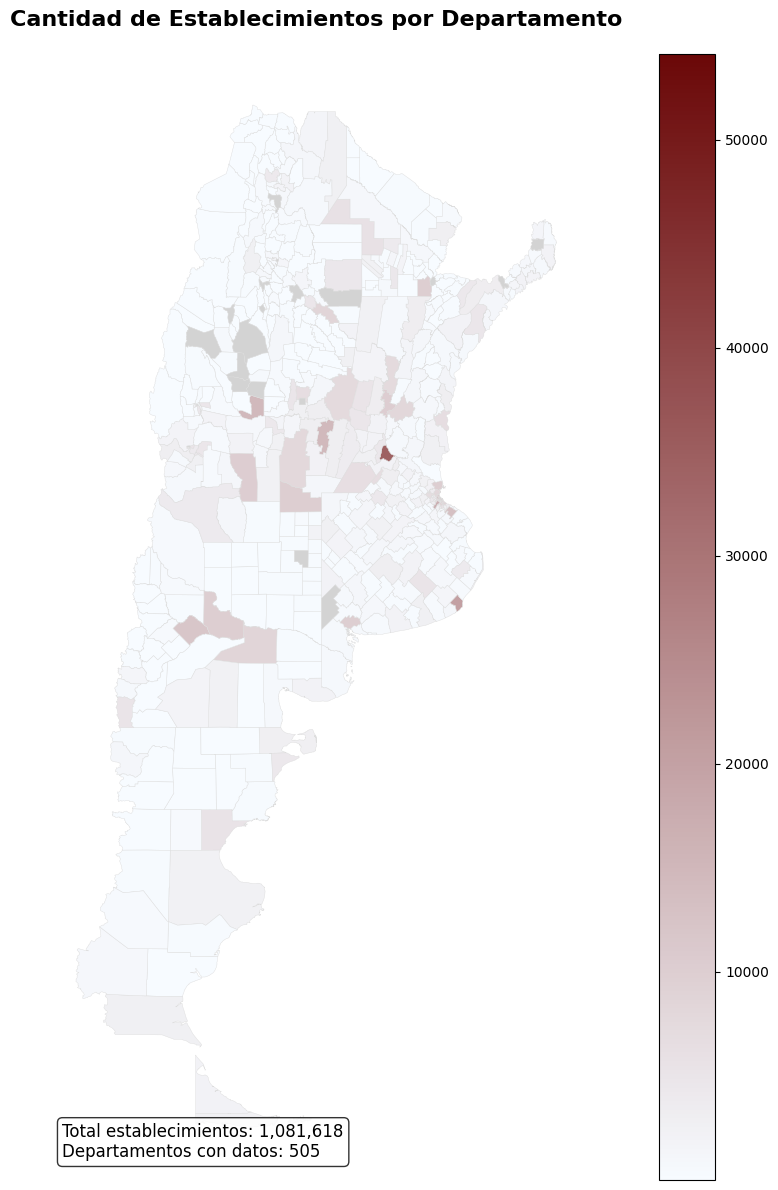

In [ ]:
# Crear el cartograma
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Configurar el colormap
cmap = LinearSegmentedColormap.from_list('establecimientos', ["#fff7f7", "#c01111"])

# Plotear el mapa
gdf_merged.plot(column='establecimientos', 
                ax=ax, 
                cmap=cmap,
                legend=True,
                edgecolor="#DDDDDD",
                linewidth=0.3,
                missing_kwds={'color': 'lightgrey', 'label': 'Sin datos'})

# Configuraciones del gráfico
ax.set_title('Cantidad de Establecimientos por Departamento', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()

# Agregar información adicional
total_establecimientos = gdf_merged['establecimientos'].sum()
deptos_con_datos = gdf_merged['establecimientos'].notna().sum()

ax.text(0.02, 0.02, 
        f'Total establecimientos: {total_establecimientos:,.0f}\nDepartamentos con datos: {deptos_con_datos}', 
        transform=ax.transAxes, fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

In [55]:
# Filtrar por provincia Buenos Aires para obtener el AMBA y toda la provincia
gdf_buenos_aires = gdf_merged[gdf_merged['Nombre de provincia'] == 'Buenos Aires'].copy()

print(f"Departamentos/partidos de Buenos Aires encontrados: {len(gdf_buenos_aires)}")
print(f"Total establecimientos en Buenos Aires: {gdf_buenos_aires['establecimientos'].sum():,.0f}")

# Mostrar algunos departamentos
print("\nMuestra de departamentos de Buenos Aires:")
print(gdf_buenos_aires[['Nombre', 'establecimientos']].head(10))

Departamentos/partidos de Buenos Aires encontrados: 134
Total establecimientos en Buenos Aires: 336,891

Muestra de departamentos de Buenos Aires:
                   Nombre  establecimientos
0           Adolfo Alsina            1973.0
1  Adolfo Gonzales Chaves             372.0
2                 Alberti             301.0
3         Almirante Brown            5763.0
4              Avellaneda            8567.0
5                Ayacucho             861.0
6                    Azul            1970.0
7            Bahía Blanca           10033.0
8                Balcarce            1395.0
9                Baradero             907.0


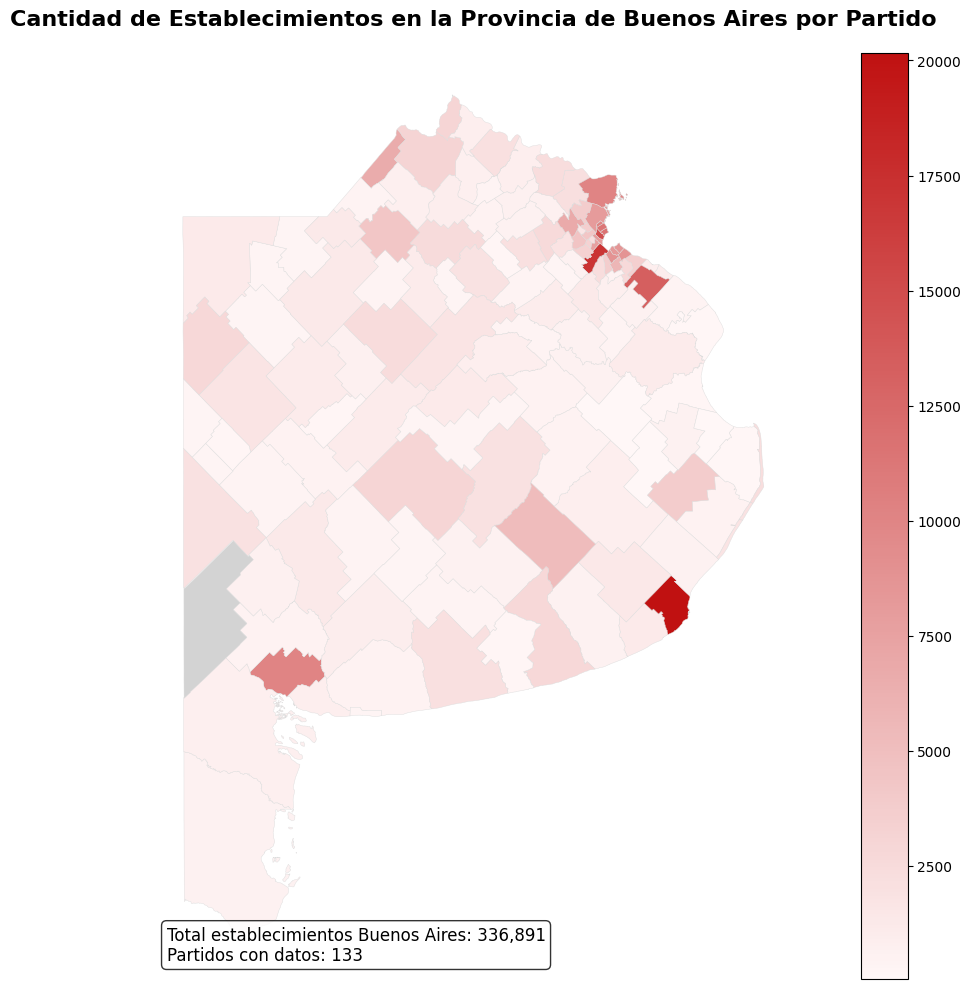

In [ ]:
# Cartograma de toda la provincia de Buenos Aires
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Configurar el colormap (usando tu configuración)
cmap = LinearSegmentedColormap.from_list('establecimientos', ["#fff7f7", "#c01111"])

# Plotear el mapa de Buenos Aires
gdf_buenos_aires.plot(column='establecimientos', 
                      ax=ax, 
                      cmap=cmap,
                      legend=True,
                      edgecolor="#DDDDDD",
                      linewidth=0.3,
                      missing_kwds={'color': 'lightgrey', 'label': 'Sin datos'})

# Configuraciones del gráfico
ax.set_title('Cantidad de Establecimientos en la Provincia de Buenos Aires por Partido', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()

# Agregar información adicional
total_establecimientos_ba = gdf_buenos_aires['establecimientos'].sum()
deptos_con_datos_ba = gdf_buenos_aires['establecimientos'].notna().sum()

ax.text(0.02, 0.02, 
        f'Total establecimientos Buenos Aires: {total_establecimientos_ba:,.0f}\nPartidos con datos: {deptos_con_datos_ba}', 
        transform=ax.transAxes, fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()